# CH04 - 4.5.2.1

In [3]:
from Chapter4.FrequencyAbstraction import FourierTransformation
from util.VisualizeDataset import VisualizeDataset
import os
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
plt.rcParams["figure.figsize"] = [15,10]

In [4]:
rawdatapth = "data/result-given/"
outputpth = "data/intermediate/"

if not os.path.exists(outputpth):
    print("Empty path, so creating..." + outputpth + "...done!")
    os.makedirs(outputpth)

In [10]:
dataset = pd.read_csv(rawdatapth + "chapter3_result_final.csv", index_col=0)
dataset.index = pd.to_datetime(dataset.index)
dataset

,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,gyr_watch_x,...,mag_watch_y,mag_watch_z,press_phone_pressure,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7
2016-02-08 18:28:25.656222,-0.090433,0.164264,9.631744,9.550840,0.197679,1.513430,-0.008810,0.018548,-0.001514,0.001668,...,58.998207,-23.318370,1029.04100,-0.138962,0.675065,-0.020069,-0.084507,0.244687,-0.080519,0.053687
2016-02-08 18:28:25.906222,-0.096204,0.168119,9.632371,9.551758,0.189616,1.514936,-0.008766,0.018608,-0.001691,0.002291,...,58.959727,-23.886958,1029.13200,-0.142551,0.679169,-0.022941,-0.084407,0.244757,-0.081975,0.055431
2016-02-08 18:28:26.156222,-0.091631,0.166526,9.636167,9.551339,0.194102,1.511228,-0.008963,0.018207,-0.002332,0.001881,...,58.133900,-25.272319,1029.28200,-0.148400,0.683118,-0.027784,-0.086871,0.244483,-0.083682,0.053949
2016-02-08 18:28:26.406222,-0.087132,0.167139,9.633979,9.550147,0.200357,1.504115,-0.008844,0.018436,-0.002050,0.001919,...,58.255560,-24.346528,1029.36900,-0.151896,0.684830,-0.028696,-0.087882,0.245115,-0.081567,0.053176
2016-02-08 18:28:26.656222,-0.093228,0.166913,9.628586,9.552066,0.200733,1.501253,-0.008886,0.018699,-0.002256,0.001889,...,59.248007,-23.400963,1029.26800,-0.148518,0.683540,-0.028142,-0.086783,0.246321,-0.079860,0.054990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-08 20:41:03.906222,-0.162021,0.183981,9.610694,-5.261667,-5.561800,7.313867,-0.008600,0.021403,0.002039,0.358750,...,8.125000,-38.250000,1011.02275,0.547497,-0.017961,-0.105356,-0.318613,-0.203828,-0.054131,-0.103938
2016-02-08 20:41:04.156222,-0.162810,0.185584,9.611845,-5.261667,-5.561800,7.313867,-0.008668,0.021285,0.002012,0.358750,...,8.125000,-38.250000,1011.00850,0.548084,-0.018241,-0.105020,-0.318367,-0.203938,-0.054196,-0.103847
2016-02-08 20:41:04.406222,-0.160333,0.186314,9.614440,-5.261667,-5.561800,7.313867,-0.008577,0.020943,0.002204,0.358750,...,8.125000,-38.250000,1011.07600,0.545614,-0.017164,-0.105110,-0.318736,-0.204194,-0.054280,-0.104262
2016-02-08 20:41:04.656222,-0.158529,0.184669,9.614019,-5.261667,-5.561800,7.313867,-0.008463,0.020901,0.002311,0.358750,...,8.125000,-38.250000,1010.84500,0.554012,-0.020147,-0.105922,-0.318150,-0.202848,-0.053750,-0.102880


In [6]:
DataViz = VisualizeDataset()
FreqAbs = FourierTransformation()

In [9]:
ms = (dataset.index[1] - dataset.index[0]).microseconds/1000
ms

250.0

In [6]:
col = "acc_phone_x"
fs = float(1000)/ms
ws = int(float(10000)/ms)
datafreq = FreqAbs.abstract_frequency(copy.deepcopy(dataset), [col], ws, fs)
datafreq

,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,gyr_watch_x,...,acc_phone_x_freq_1.1_Hz_ws_40,acc_phone_x_freq_1.2_Hz_ws_40,acc_phone_x_freq_1.3_Hz_ws_40,acc_phone_x_freq_1.4_Hz_ws_40,acc_phone_x_freq_1.5_Hz_ws_40,acc_phone_x_freq_1.6_Hz_ws_40,acc_phone_x_freq_1.7_Hz_ws_40,acc_phone_x_freq_1.8_Hz_ws_40,acc_phone_x_freq_1.9_Hz_ws_40,acc_phone_x_freq_2.0_Hz_ws_40
2016-02-08 18:28:25.656222,-0.090433,0.164264,9.631744,9.550840,0.197679,1.513430,-0.008810,0.018548,-0.001514,0.001668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-08 18:28:25.906222,-0.096204,0.168119,9.632371,9.551758,0.189616,1.514936,-0.008766,0.018608,-0.001691,0.002291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-08 18:28:26.156222,-0.091631,0.166526,9.636167,9.551339,0.194102,1.511228,-0.008963,0.018207,-0.002332,0.001881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-08 18:28:26.406222,-0.087132,0.167139,9.633979,9.550147,0.200357,1.504115,-0.008844,0.018436,-0.002050,0.001919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-08 18:28:26.656222,-0.093228,0.166913,9.628586,9.552066,0.200733,1.501253,-0.008886,0.018699,-0.002256,0.001889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-08 20:41:03.906222,-0.162021,0.183981,9.610694,-5.261667,-5.561800,7.313867,-0.008600,0.021403,0.002039,0.358750,...,-0.011382,-0.002856,0.028808,0.003311,-0.006193,0.002204,0.002460,0.002531,0.002557,0.002566
2016-02-08 20:41:04.156222,-0.162810,0.185584,9.611845,-5.261667,-5.561800,7.313867,-0.008668,0.021285,0.002012,0.358750,...,-0.005122,-0.000805,-0.002357,-0.001999,0.005300,0.002090,0.001344,0.001153,0.001051,0.001004
2016-02-08 20:41:04.406222,-0.160333,0.186314,9.614440,-5.261667,-5.561800,7.313867,-0.008577,0.020943,0.002204,0.358750,...,0.015927,0.006399,-0.024007,0.001507,0.001580,-0.003168,-0.002659,-0.002675,-0.002686,-0.002689
2016-02-08 20:41:04.656222,-0.158529,0.184669,9.614019,-5.261667,-5.561800,7.313867,-0.008463,0.020901,0.002311,0.358750,...,-0.000637,-0.005236,0.018827,-0.003297,-0.011500,-0.001683,-0.001574,-0.001238,-0.001034,-0.000940


Figure saved to figures\figure_1.png


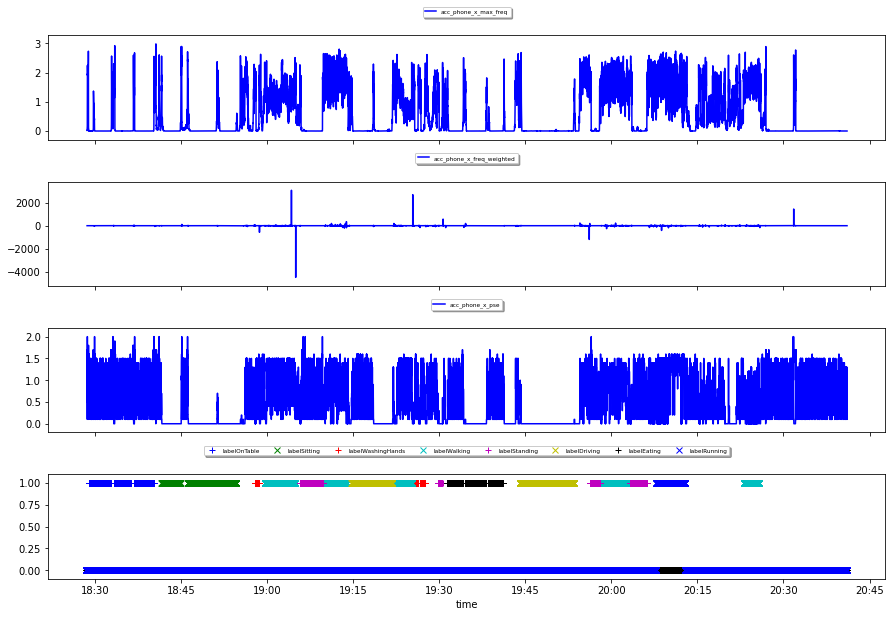

In [7]:
cols = ['acc_phone_x_max_freq', 'acc_phone_x_freq_weighted', 'acc_phone_x_pse', 'label']
DataViz.plot_dataset(datafreq, cols, ['like', 'like', 'like', 'like'], ['line', 'line', 'line','points'])

Figure saved to figures\figure_2.png


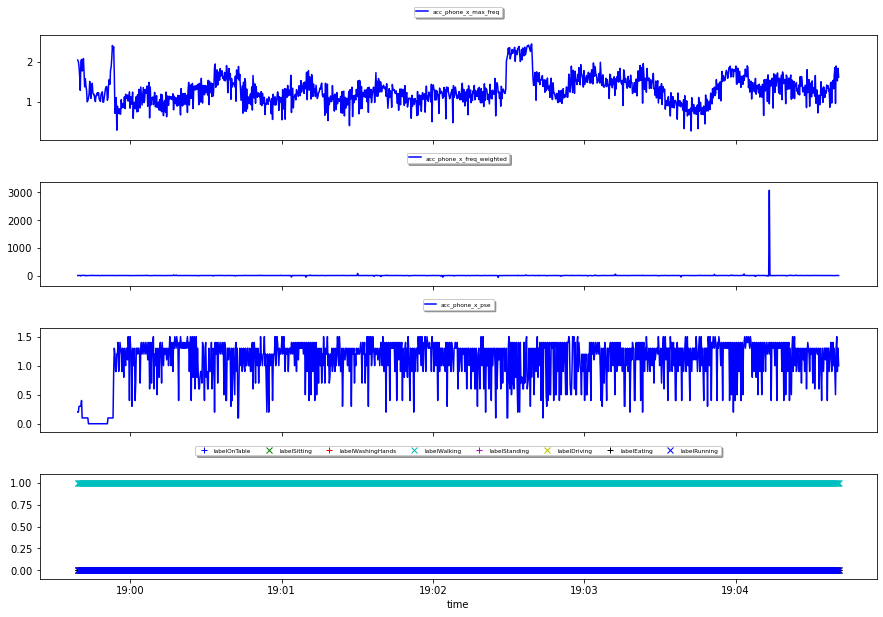

In [8]:
datawalk = datafreq[datafreq["labelWalking"] != 0][:len(datafreq[datafreq['labelRunning'] != 0])]
DataViz.plot_dataset(datawalk, cols, ['like', 'like', 'like', 'like'], ['line', 'line', 'line','points'])

In [9]:
for col in cols:
    if col != "label":
        print("feature: ", col)
        print("mean: ", datawalk[col].mean())
        print("std: ", datawalk[col].std())
        print("max: ", datawalk[col].max())
        print("min: ", datawalk[col].min())
        print("\n")

feature:  acc_phone_x_max_freq
mean:  1.293030248338022
std:  0.35129217824553965
max:  2.4466235881981517
min:  0.26428442996035195


feature:  acc_phone_x_freq_weighted
mean:  2.2926525844879015
std:  88.7000508852418
max:  3075.1971524605783
min:  -67.03139548600763


feature:  acc_phone_x_pse
mean:  1.0719370860927115
std:  0.3843227154912141
max:  1.5
min:  0.0




Figure saved to figures\figure_3.png


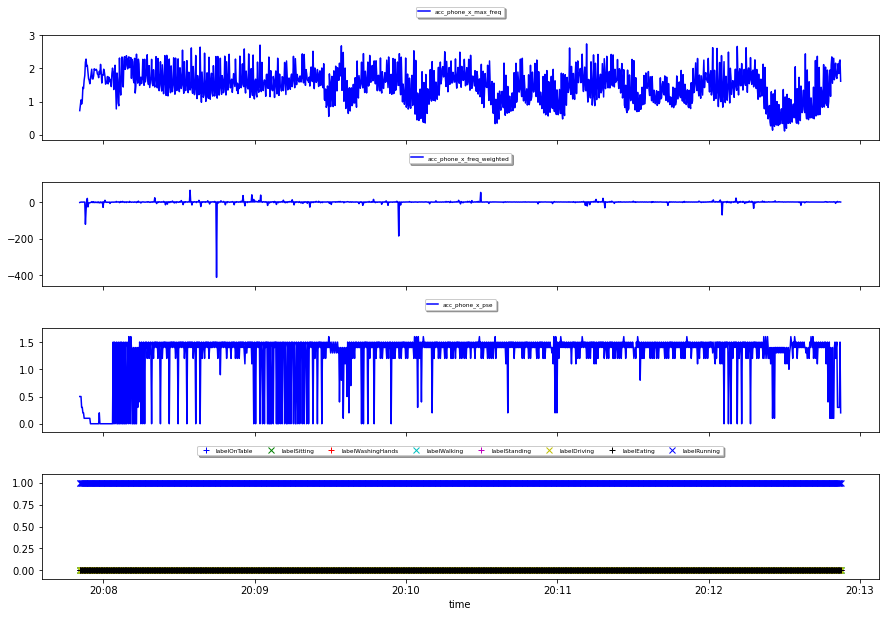

In [10]:
datarun = datafreq[datafreq["labelRunning"] != 0]
DataViz.plot_dataset(datarun, cols, ['like', 'like', 'like', 'like'], ['line', 'line', 'line','points'])

In [11]:
for col in cols:
    if col != "label":
        print("feature: ", col)
        print("mean: ", datarun[col].mean())
        print("std: ", datarun[col].std())
        print("max: ", datarun[col].max())
        print("min: ", datarun[col].min())
        print("\n")

feature:  acc_phone_x_max_freq
mean:  1.4827927126719478
std:  0.5047057486081046
max:  2.7379125175473167
min:  0.1148595293768841


feature:  acc_phone_x_freq_weighted
mean:  0.20623291477748695
std:  14.550026925313539
max:  65.4309360511682
min:  -412.38053008720755


feature:  acc_phone_x_pse
mean:  1.2368377483443789
std:  0.4624694353398828
max:  1.6
min:  0.0


